<span style="color:blue">**Using Machine Learning to Predict Carbon Footprint:<br> K-Means Clustering TEST1**</span><br>





<img src="/Users/miguelopez/Desktop/4-Proyecto ML/img/carbon.png" width="500">

In [1]:
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline



In [2]:
df = pd.read_csv('/Users/miguelopez/Desktop/4-Proyecto ML/src/data_processed/df_final.csv')

In [3]:
df.tail()

,Unnamed: 0,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Body Type_normal,Body Type_obese,...,Cooking_With_['Oven'],"Cooking_With_['Stove', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[]
9995,9995,0.722892,0.026803,0.666667,0.500000,0.54,0.375000,0.260439,0,1,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0.738956,0.531653,0.333333,0.583333,0.16,1.000000,0.344195,1,0,...,0,0,0,1,0,0,0,0,0,0
9997,9997,0.995984,0.009601,0.666667,0.458333,0.10,1.000000,0.256598,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,0.518072,0.868887,0.666667,0.791667,0.28,0.208333,0.528807,0,0,...,0,0,1,0,0,0,0,0,0,0
9999,9999,0.261044,0.995300,0.500000,0.458333,0.12,0.000000,0.064428,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Unnamed: 0', 'Monthly Grocery Bill', 'Vehicle Monthly Distance Km',
       'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'CarbonEmission', 'Body Type_normal', 'Body Type_obese',
       'Body Type_overweight', 'Body Type_underweight', 'Sex_female',
       'Sex_male', 'Diet_omnivore', 'Diet_pescatarian', 'Diet_vegan',
       'Diet_vegetarian', 'How Often Shower_daily',
       'How Often Shower_less frequently', 'How Often Shower_more frequently',
       'How Often Shower_twice a day', 'Heating Energy Source_coal',
       'Heating Energy Source_electricity',
       'Heating Energy Source_natural gas', 'Heating Energy Source_wood',
       'Transport_private', 'Transport_public', 'Transport_walk/bicycle',
       'Vehicle Type_diesel', 'Vehicle Type_electric', 'Vehicle Type_hybrid',
       'Vehicle Type_lpg', 'Vehicle Type_petrol', 'Social Activity_never',
       'Social Activity_often', 'Social Ac

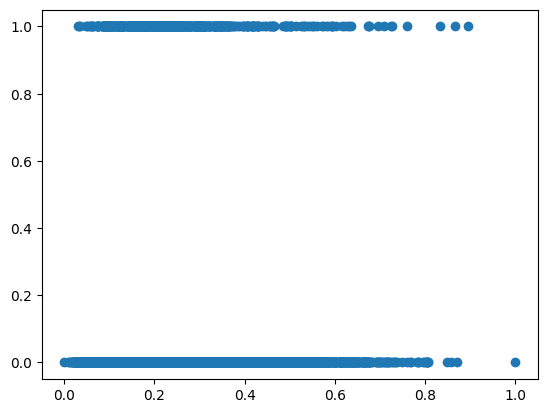

In [5]:
# carbon emissions vs "Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']
plt.scatter(df["CarbonEmission"],df["Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']"])   

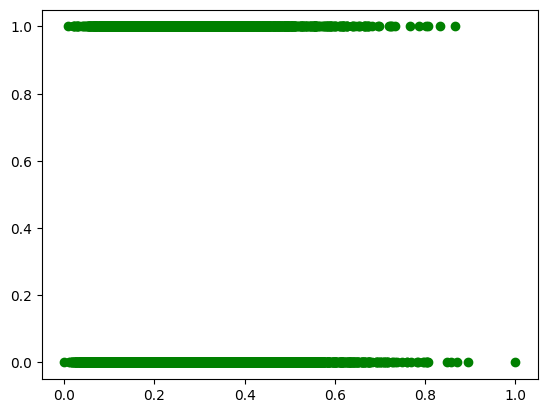

In [6]:
# Carbon Emissions vs Diet omnivore
plt.scatter(df['CarbonEmission'], df['Diet_omnivore'],color='green')

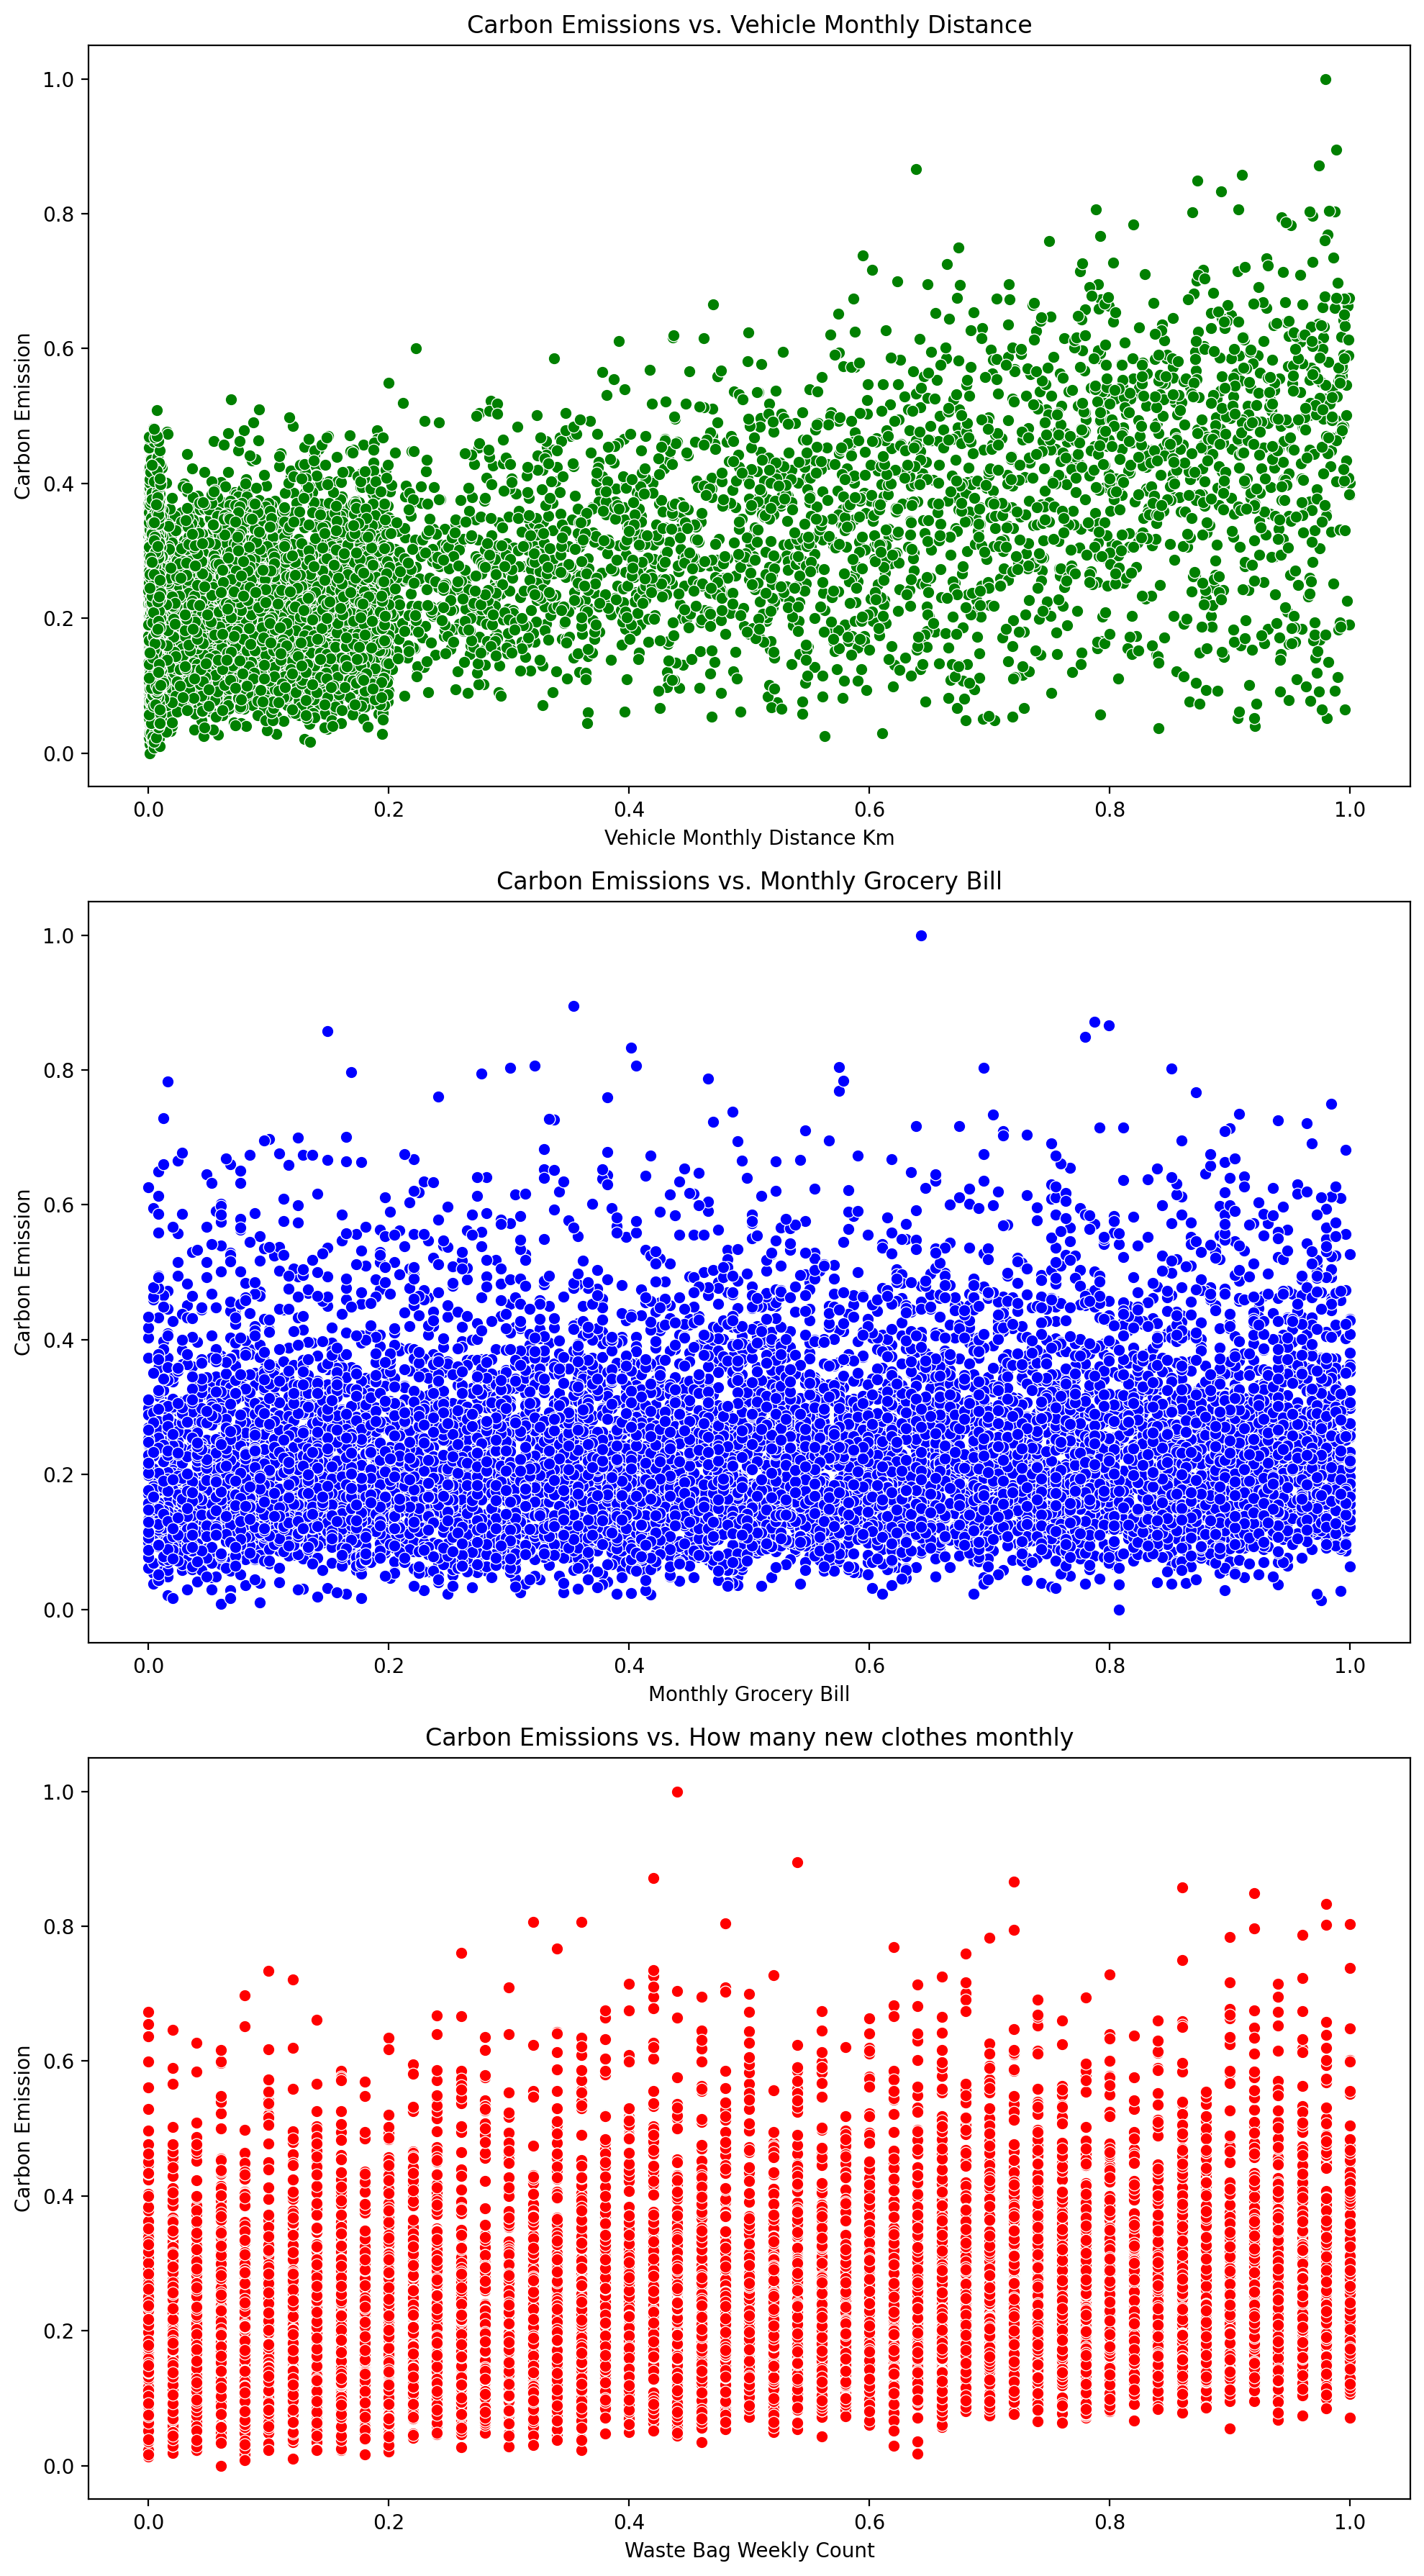

In [7]:
# set plotting parameters
fig, axes = plt.subplots(3, 1, figsize=(10, 18), dpi=200)

# Carbon Emissions vs. Monthly Grocery Bill
sns.scatterplot(ax=axes[1], x='Monthly Grocery Bill', y='CarbonEmission', data=df, color='blue')
axes[1].set_title('Carbon Emissions vs. Monthly Grocery Bill')
axes[1].set_xlabel('Monthly Grocery Bill')
axes[1].set_ylabel('Carbon Emission')


# Carbon Emissions vs. Vehicle Monthly Distance Km
sns.scatterplot(ax=axes[0], x='Vehicle Monthly Distance Km', y='CarbonEmission', data=df, color='green')
axes[0].set_title('Carbon Emissions vs. Vehicle Monthly Distance')
axes[0].set_xlabel('Vehicle Monthly Distance Km')
axes[0].set_ylabel('Carbon Emission')

# Carbon Emissions vs. how many new clothes monthly 
sns.scatterplot(ax=axes[2], x='How Many New Clothes Monthly', y='CarbonEmission', data=df, color='red')
axes[2].set_title('Carbon Emissions vs. How many new clothes monthly')  
axes[2].set_xlabel('Waste Bag Weekly Count')
axes[2].set_ylabel('Carbon Emission')

plt.tight_layout()
plt.show()


In [8]:
# Removing outliers Isolation Forest    
from sklearn.ensemble import IsolationForest

# Isolation Forest model
iforest = IsolationForest(contamination=0.1) 

# Fit 
iforest.fit(df)

# Get outlier scores
scores = iforest.decision_function(df) 

# threshold
threshold = np.percentile(scores, 90)

# Remove outliers
df = df[scores > threshold]


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


KMeans(n_clusters=5)

In [9]:

X = df[["CarbonEmission", "Vehicle Monthly Distance Km",
        'How Many New Clothes Monthly']]
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=5, random_state=42)

In [10]:
# centroids positions 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids

array([[0.18336743, 0.04560093, 0.13803109],
       [0.21896132, 0.05015019, 0.86719298],
       [0.18256489, 0.05267594, 0.37315789],
       [0.20705689, 0.04858792, 0.61096346],
       [0.28203857, 0.50415042, 0.45333333]])

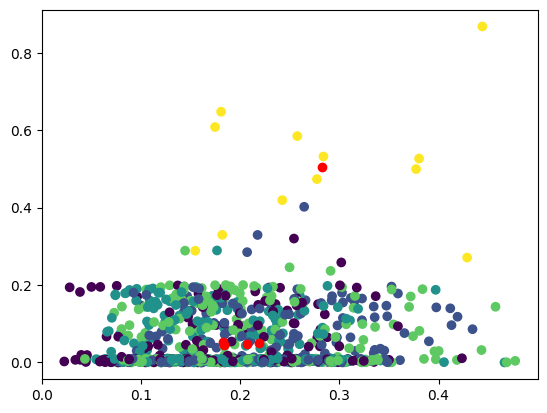

In [11]:
plt.scatter(X["CarbonEmission"], X["Vehicle Monthly Distance Km"], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()


In [12]:

from scipy.spatial.distance import cdist


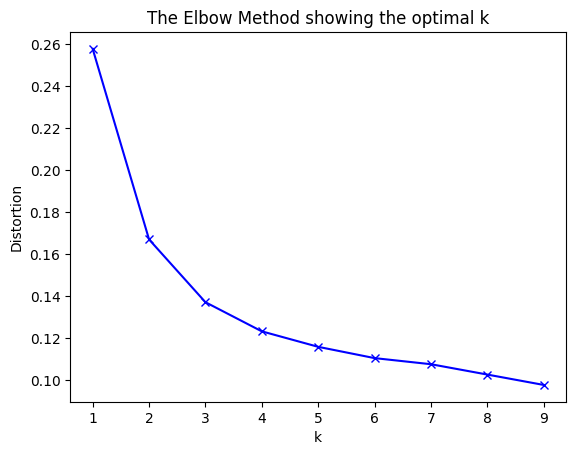

In [13]:

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [14]:

km = KMeans(n_clusters=5) 
km    


KMeans(n_clusters=5)

In [15]:
y_predict = km.fit_predict(df[["CarbonEmission", "Vehicle Monthly Distance Km"]])
y_predict

array([1, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 4, 2, 1, 0, 0, 1, 4, 0, 2, 2,
       4, 4, 4, 4, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0, 4, 1, 0, 2, 1, 2, 0, 4,
       2, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 4, 2, 4, 2, 4, 0, 1,
       2, 2, 0, 1, 4, 2, 1, 0, 0, 0, 2, 4, 0, 0, 1, 2, 4, 2, 0, 0, 4, 0,
       0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 0, 1,
       4, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 1, 4, 0, 2, 0, 2, 1, 0, 2,
       3, 1, 2, 4, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1, 0, 2, 4, 2, 1,
       0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 1, 0,
       0, 3, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 4, 1, 2,
       1, 3, 2, 0, 1, 1, 2, 2, 1, 4, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1,
       1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 2, 0, 4, 2,
       2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 4, 2, 2, 4, 2, 2, 2, 3, 2, 2, 0, 1,
       2, 0, 2, 0, 2, 1, 2, 2, 4, 0, 2, 2, 1, 0, 1,

In [16]:
# Cluster to df 
df['cluster'] = y_predict 
df 

,Unnamed: 0,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Body Type_normal,Body Type_obese,...,"Cooking_With_['Stove', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[],cluster
13,13,0.244980,0.289329,0.833333,0.541667,0.32,0.416667,0.176682,0,0,...,0,0,0,0,1,0,0,0,0,1
72,72,0.301205,0.156416,0.666667,0.166667,0.30,0.958333,0.197002,1,0,...,0,0,0,0,0,0,0,0,0,1
85,85,0.694779,0.005001,0.333333,0.500000,0.70,0.916667,0.248049,1,0,...,0,0,0,0,0,0,0,0,0,0
98,98,0.285141,0.019402,0.833333,0.625000,0.32,0.750000,0.146946,0,0,...,1,0,0,0,0,0,0,0,0,2
109,109,0.425703,0.013101,0.000000,0.583333,0.40,0.958333,0.334903,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9841,9841,0.269076,0.009401,0.666667,0.833333,0.70,0.750000,0.161442,0,0,...,0,0,0,0,0,1,0,0,0,2
9870,9870,0.401606,0.113111,0.500000,0.750000,0.42,0.041667,0.306901,0,1,...,0,0,0,0,0,0,0,0,0,4
9918,9918,0.297189,0.005601,0.666667,0.375000,0.62,0.833333,0.298600,1,0,...,0,0,0,0,1,0,0,0,0,0
9948,9948,0.377510,0.009901,0.333333,0.791667,0.34,0.166667,0.237765,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:

# Def and pllot the identified clusters

df1=df[df.cluster==0]
df2=df[df.cluster==1]   
df3=df[df.cluster==2] 
df4=df[df.cluster==3] 
df5=df[df.cluster==4]
df6=df[df.cluster==5]   


 



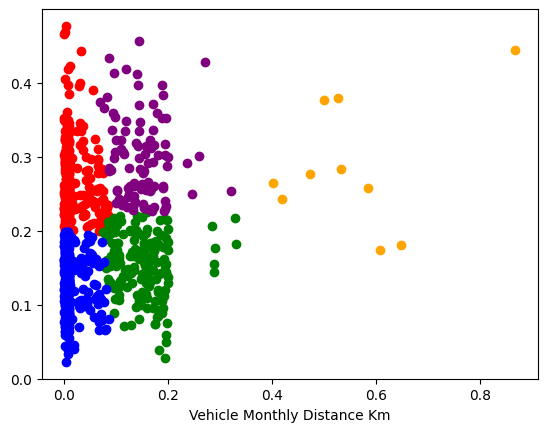

In [18]:
plt.scatter(df1['Vehicle Monthly Distance Km'], df1['CarbonEmission'], color='red')
plt.scatter(df2['Vehicle Monthly Distance Km'], df2['CarbonEmission'], color='green')
plt.scatter(df3['Vehicle Monthly Distance Km'], df3['CarbonEmission'], color='blue')
plt.scatter(df4['Vehicle Monthly Distance Km'], df4['CarbonEmission'], color='orange')  
plt.scatter(df5['Vehicle Monthly Distance Km'], df5['CarbonEmission'], color='purple')  
plt.scatter(df6['Vehicle Monthly Distance Km'], df6['CarbonEmission'], color='black')   

plt.xlabel('Vehicle Monthly Distance Km')
plt.show()

In [19]:
df

,Unnamed: 0,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Body Type_normal,Body Type_obese,...,"Cooking_With_['Stove', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[],cluster
13,13,0.244980,0.289329,0.833333,0.541667,0.32,0.416667,0.176682,0,0,...,0,0,0,0,1,0,0,0,0,1
72,72,0.301205,0.156416,0.666667,0.166667,0.30,0.958333,0.197002,1,0,...,0,0,0,0,0,0,0,0,0,1
85,85,0.694779,0.005001,0.333333,0.500000,0.70,0.916667,0.248049,1,0,...,0,0,0,0,0,0,0,0,0,0
98,98,0.285141,0.019402,0.833333,0.625000,0.32,0.750000,0.146946,0,0,...,1,0,0,0,0,0,0,0,0,2
109,109,0.425703,0.013101,0.000000,0.583333,0.40,0.958333,0.334903,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9841,9841,0.269076,0.009401,0.666667,0.833333,0.70,0.750000,0.161442,0,0,...,0,0,0,0,0,1,0,0,0,2
9870,9870,0.401606,0.113111,0.500000,0.750000,0.42,0.041667,0.306901,0,1,...,0,0,0,0,0,0,0,0,0,4
9918,9918,0.297189,0.005601,0.666667,0.375000,0.62,0.833333,0.298600,1,0,...,0,0,0,0,1,0,0,0,0,0
9948,9948,0.377510,0.009901,0.333333,0.791667,0.34,0.166667,0.237765,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# number of customers in each segment:
df['cluster'].value_counts()


2    380
0    344
1    169
4     97
3     10
Name: cluster, dtype: int64

In [21]:
cluster_pct = (df['cluster'].value_counts() / len(df)) * 100
cluster_pct

2    38.0
0    34.4
1    16.9
4     9.7
3     1.0
Name: cluster, dtype: float64

<AxesSubplot: ylabel='cluster'>

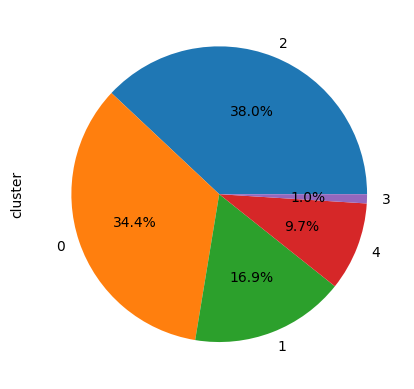

In [22]:
cluster_pct.plot.pie(autopct='%1.1f%%')


In [23]:
# PCA
from sklearn.decomposition import PCA
# fit 
pca = PCA()
pca.fit(X)
# transform 
X_pca = pca.transform(X)    

# fit kmeans on PCA 
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X_pca)

KMeans(n_clusters=3)

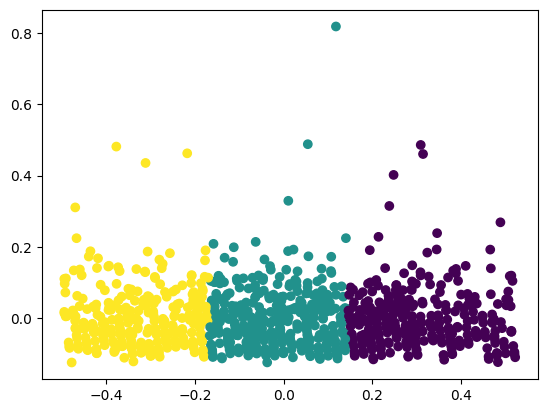

In [24]:
# plot PCA
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_)


In [25]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_pca, kmeans.labels_)
print(score)    


0.3897753790502046


In [26]:
# DBSCAN
from sklearn.cluster import DBSCAN
# fit
dbscan = DBSCAN()
dbscan.fit(X_pca) 
# extract labels 
dbscan_labels = dbscan.labels_  
dbscan_labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

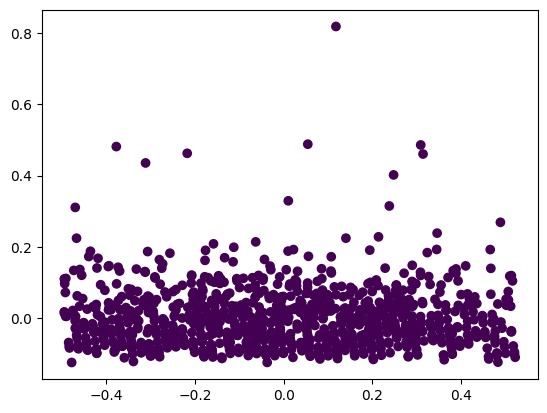

In [27]:
# db_scan Labels 
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan.labels_)


Text(0, 0.5, 'PCA Component 2')

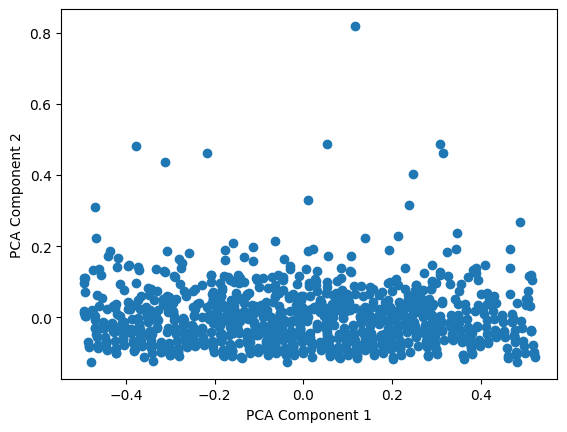

In [28]:
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

In [29]:
# k-means again on the PCA transformed data 


In [30]:
# PCA transforom data / fit 

pca = PCA(n_components=2) 
pca.fit(X)
X_pca = pca.transform(X)


In [31]:
# Fit Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca) 


KMeans(n_clusters=3)

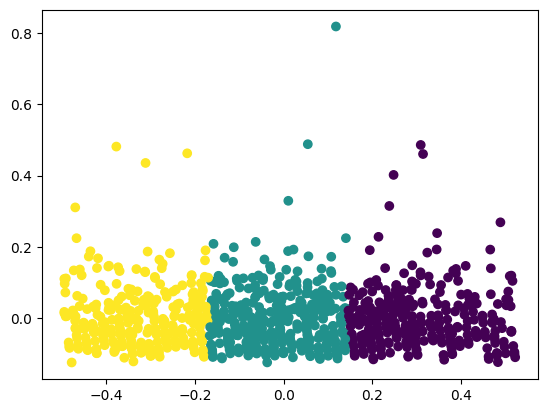

In [32]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_)


In [33]:
score = silhouette_score(X_pca, kmeans.labels_)

print(score)


0.4541080431452465


In [41]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(df, kmeans.labels_)
score

0.3346367293853051

In [34]:
labels = kmeans.labels_
labels_series = pd.Series(labels)
cluster_pca = (labels_series.value_counts() / len(labels_series)) * 100
cluster_pca.sort_values(ascending=False)    

1    37.8
0    32.8
2    29.4
dtype: float64

<AxesSubplot: >

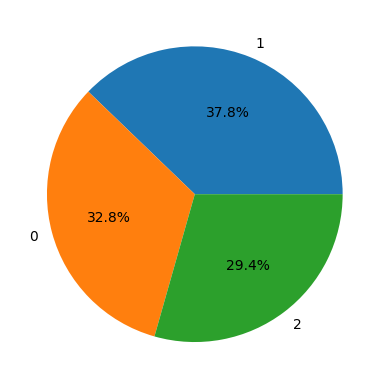

In [35]:
cluster_pca.plot.pie(autopct='%1.1f%%')

In [36]:
import pickle

# Trained modelstored in 'kmeans'

# Save model to pickle file
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file) 
